# DEFINE PROBLEM

- Offering an Car Insurance Product might be stressful for marketing team who don't know about their customers

# DEFINE GOALS

- Help bank to create strategy to create high rate Car Insurance acceptance  by understanding customers behaviour through customes prediction
- Find out which features/columns affecting customers to acccept/reject carInsurance
- This research will be utilized to created customers Car Insurance Acceptance prediction Machine Learning Model  

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
import dateparser
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 999

### IMPORT FILE

In [2]:
df = pd.read_csv('Insurance.csv')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


##### COLUMNS DESCRIPTION
Source : PDF FILE

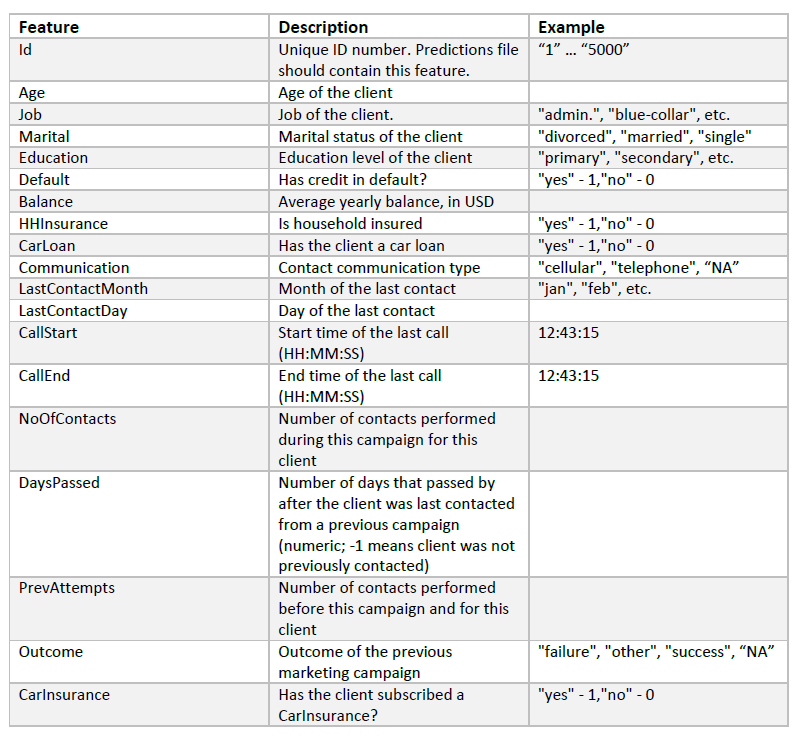

In [4]:
Image('InsuranceColumnDescription.png')

In [5]:
print(df.shape)

(4000, 19)


### COLUMN SUMMARY

In [6]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,Id,int64,0,0.00,4000,"[540, 2812]"
1,Age,int64,0,0.00,70,"[35, 24]"
2,Job,object,19,0.48,11,"[retired, blue-collar]"
3,Marital,object,0,0.00,3,"[married, single]"
4,Education,object,169,4.23,3,"[secondary, nan]"
5,Default,int64,0,0.00,2,"[0, 1]"
6,Balance,int64,0,0.00,2178,"[402, 50]"
7,HHInsurance,int64,0,0.00,2,"[1, 0]"
8,CarLoan,int64,0,0.00,2,"[0, 1]"
9,Communication,object,902,22.55,2,"[telephone, cellular]"


- df.head(), df.shape, dfDesc are utilized to capture dataset genereal information

====================================================================================================================

## DATA PREPARATION & HANDLING MISSING VALUE CHECKING

In [8]:
df.isna().sum()
## From information below, dataset have some missing value ==> need further handling

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

#### Job Column

In [9]:
# Fill missing value with Job Modus
df['Job'] = df['Job'].fillna(df['Job'].mode()[0])

#### Education Column

In [10]:
# Fill missing value with Education Modus
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

#### Communication Column

In [11]:
# Fill missing value with Communication Modus
df['Communication'] = df['Communication'].fillna(df['Communication'].mode()[0])

#### Outcome Column

In [12]:
# Due to high percentage of missing value (76%) outcome column will be dropped
df.drop(columns = ['Outcome'], inplace=True)

In [13]:
df.isna().sum()
# No more missing value

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

#### Create Call Time Column

In [14]:
df['CallStart'] = df['CallStart'].astype('datetime64[ns]')
df['CallEnd'] = df['CallEnd'].astype('datetime64[ns]')
## Change Date Tipe Type Data Into datetime64

In [15]:
df['CallDuration'] = df['CallEnd'] - df['CallStart'] 

In [16]:
df['CallDuration'] = df['CallDuration'].dt.components['minutes']*60 + df['CallDuration'].dt.components['seconds']

In [17]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,CallDuration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2021-04-29 13:45:20,2021-04-29 13:46:30,0,70
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,2021-04-29 14:49:03,2021-04-29 14:52:08,0,185
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,2021-04-29 16:30:24,2021-04-29 16:36:04,1,340
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,2021-04-29 12:06:43,2021-04-29 12:20:22,1,819
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,2021-04-29 14:35:44,2021-04-29 14:38:56,0,192


In [18]:
df.dtypes

Id                           int64
Age                          int64
Job                         object
Marital                     object
Education                   object
Default                      int64
Balance                      int64
HHInsurance                  int64
CarLoan                      int64
Communication               object
LastContactDay               int64
LastContactMonth            object
NoOfContacts                 int64
DaysPassed                   int64
PrevAttempts                 int64
CallStart           datetime64[ns]
CallEnd             datetime64[ns]
CarInsurance                 int64
CallDuration                 int64
dtype: object

===========================================================================================================================

# DESCRIPTIVE ANALYSIS AND HANDLING OUTLIERS

### DESCRIPTIVE ANALYSIS

In [19]:
round(df.describe(),2)
# The Lowest customer's age is 18, The Highest customer's age is 95, while average customer's age is 41
# Most customers don't have credit default
# The Lowest customer's balance is -$3058, the highest customer's balance is $98417, while average customer's balance is $1532
# Half of customers insured their household while half of customers don't insured their houshold
# Most customers don't have car loan
# Average number of days marketing team last contact customers is 15 days
# Minimal number of days marketing team last contact customers is 1 days
# Maximal number of days marketing team last contact customers is 31 days
# Average number of call are made by team marketing to contact one customer is 2.61 in this campaign (NoOfContacts)
# Maximal number of call are made by team marketing to contact one customer is 43 in this campaign (NoOfContacts)
# Minimal number of call are made by team marketing to contact one customer is 1 in this campaign (NoOfContacts)
# Mostly customers was not contacted on previous campaign (DayPassed)
# Before this campaign, team marketing barely never contacted customers (PrevAttempts Mean 0.72)
# But there is marketing team who contacted customers 58 times before this campaign
# Most customers don't subscibred a car insurance
# Most of call duration made was 350 seconds
# The shorthest call duration was 5 seconds
# The longest call duration was 3253 seconds

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,2000.50,41.21,0.01,1532.94,0.49,0.13,15.72,2.61,48.71,0.72,0.40,350.84
std,1154.84,11.55,0.12,3511.45,0.50,0.34,8.43,3.06,106.69,2.08,0.49,342.24
min,1.00,18.00,0.00,-3058.00,0.00,0.00,1.00,1.00,-1.00,0.00,0.00,5.00
25%,1000.75,32.00,0.00,111.00,0.00,0.00,8.00,1.00,-1.00,0.00,0.00,126.00
50%,2000.50,39.00,0.00,551.50,0.00,0.00,16.00,2.00,-1.00,0.00,0.00,232.00
75%,3000.25,49.00,0.00,1619.00,1.00,0.00,22.00,3.00,-1.00,0.00,1.00,460.00
max,4000.00,95.00,1.00,98417.00,1.00,1.00,31.00,43.00,854.00,58.00,1.00,3253.00


### OUTLIERS CHECK & HANDLING

In [20]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [21]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            
    return unique_list

In [22]:
outliers = []
cek_outlier(df['Age'])
print(len(outliers))
print(unique(outliers))
## There are 52 Outliers of Age
## Since the data is needed, Age outliers will not be removed

52
[80, 79, 78, 77, 75, 87, 83, 82, 84, 81, 76, 92, 86, 95]


In [23]:
outliers = []
cek_outlier(df['Balance'])
print(len(outliers))
print(unique(outliers))
## There are 383 customers which Balance are outliers
## Since the data is needed, Balance outliers will not be removed

383
[7331, 8304, 6981, 3935, 4420, 6013, 5091, 11887, 11350, 25824, 3969, 9299, 9367, 7162, 4151, 6101, 5157, 3904, 7111, 4466, 8038, 52587, 16178, 4348, 6784, 6385, 8163, 13551, 7108, 8491, 11115, 8553, 6993, 4951, 17056, 29340, 4182, 5086, 10613, 4787, 4721, 5909, 3950, 4775, 19313, 4465, 5455, 6596, 20772, 12264, 6402, 5715, 7724, 10576, 8412, 13711, 6450, 4695, 4917, 4312, 15561, 4718, 5969, 12067, 4204, 11516, 5253, 5903, 7098, 6964, 13014, 5517, 4145, 4262, 4198, 4949, 7990, 6112, 8295, 23878, 3942, 4216, 5768, 5461, 15515, 7135, 4693, 3949, 32948, 5839, 7279, 25947, 7443, 6290, 6468, 11591, 7263, 7343, 5037, 12519, 5679, 4478, 6850, 16517, 4176, 7180, 9269, 5359, 11385, 5514, 4769, 8015, 4080, 4294, 4168, 11971, 37127, 36686, 6138, 11972, 4831, 4885, 5112, 7968, 4987, 4570, 11303, 13761, 5436, 5603, 11532, 4112, 5511, 4389, 4596, 9444, 6562, 6746, 4227, 6060, 7513, 5310, 17924, 9200, 10558, 4965, 4101, 10758, 9154, 11262, 6699, 6714, 4374, 22867, 4692, 4287, 5637, 12848, 6822, 2

In [24]:
outliers = []
cek_outlier(df['LastContactDay'])
print(len(outliers))
print(unique(outliers))
## LastContactDay has no outliers value

0
[]


In [25]:
outliers = []
cek_outlier(df['NoOfContacts'])
print(len(outliers))
print(unique(outliers))
## There are 223 customers which NoOfContacts are outliers
## Since the data is needed, NoOfContacts outliers will not be removed

223
[8, 14, 7, 12, 11, 25, 34, 9, 26, 24, 10, 38, 20, 13, 16, 17, 32, 21, 15, 23, 29, 19, 28, 18, 22, 43, 30, 41, 27]


In [26]:
outliers = []
cek_outlier(df['DaysPassed'])
print(len(outliers))
print(unique(outliers))
## There are 958 customers which DaysPassed are outliers
## Since the data is needed, DaysPassed outliers will not be removed

958
[119, 109, 97, 114, 362, 95, 169, 91, 558, 84, 194, 176, 171, 327, 94, 183, 320, 352, 276, 86, 184, 728, 105, 122, 317, 90, 290, 412, 155, 350, 92, 1, 179, 189, 120, 115, 107, 88, 291, 330, 87, 370, 368, 270, 161, 74, 188, 178, 148, 532, 213, 81, 221, 433, 307, 253, 190, 170, 325, 262, 100, 385, 134, 56, 273, 211, 182, 106, 296, 323, 138, 15, 246, 93, 230, 133, 252, 126, 301, 238, 98, 195, 204, 363, 205, 167, 287, 186, 172, 173, 187, 351, 96, 828, 2, 103, 181, 544, 73, 268, 286, 364, 110, 104, 180, 295, 371, 365, 185, 331, 177, 217, 152, 13, 409, 130, 346, 272, 227, 141, 247, 151, 322, 165, 329, 164, 306, 298, 337, 417, 264, 293, 324, 415, 61, 57, 116, 258, 80, 67, 384, 292, 271, 38, 34, 89, 343, 361, 203, 683, 369, 149, 191, 239, 44, 305, 340, 297, 294, 267, 193, 321, 345, 495, 196, 154, 43, 282, 99, 208, 8, 36, 147, 775, 175, 353, 232, 257, 357, 579, 108, 389, 212, 101, 226, 254, 367, 426, 76, 174, 388, 157, 158, 280, 279, 462, 113, 83, 347, 202, 342, 316, 248, 366, 123, 285, 439

In [27]:
outliers = []
cek_outlier(df['PrevAttempts'])
print(len(outliers))
print(unique(outliers))
## There are 958 customers which PrevAttempts are outliers
## Since the data is needed, PrevAttempts outliers will not be removed

958
[1, 12, 3, 4, 2, 13, 7, 5, 6, 8, 10, 11, 30, 9, 14, 23, 18, 19, 58]


In [28]:
outliers = []
cek_outlier(df['CallDuration'])
print(len(outliers))
print(unique(outliers))
## There are 261 customers which CallDuration are outliers
## Since the data is needed, CallDuration outliers will not be removed

261
[987, 1106, 1420, 1181, 1002, 1391, 1257, 1917, 1207, 1204, 1201, 1721, 1148, 973, 1258, 1571, 1556, 1231, 1212, 1048, 970, 1142, 1019, 1023, 978, 2078, 998, 1036, 1226, 1015, 1135, 985, 1579, 1344, 1119, 1290, 1027, 1309, 1835, 1030, 1366, 1007, 1123, 1298, 1080, 1127, 966, 1224, 1532, 1374, 1062, 1867, 1303, 2231, 1341, 1134, 1422, 1702, 1484, 1273, 1184, 979, 1471, 994, 1531, 1925, 2087, 988, 1152, 1223, 1491, 1032, 1001, 1183, 984, 1340, 1103, 1022, 968, 1193, 1404, 1962, 1000, 2184, 1263, 1574, 1662, 3253, 2372, 1330, 1581, 1658, 1009, 2775, 1616, 1230, 2062, 1179, 1058, 1617, 1130, 1971, 982, 1473, 1013, 1363, 1088, 1451, 1044, 2201, 1980, 1175, 1176, 1407, 1087, 1205, 1635, 1550, 1092, 965, 1349, 1227, 1200, 1011, 1017, 977, 1241, 1689, 1368, 1790, 1467, 1359, 1031, 1196, 1877, 3025, 1112, 1143, 1500, 991, 1272, 1026, 1543, 1499, 1622, 1035, 1156, 1161, 1090, 1319, 1081, 1516, 1310, 1346, 967, 1820, 1053, 1649, 1052, 1121, 1806, 1508, 1144, 1293, 1098, 2015, 1206, 1842, 1210

In [29]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,CallDuration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2021-04-29 13:45:20,2021-04-29 13:46:30,0,70
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,2021-04-29 14:49:03,2021-04-29 14:52:08,0,185
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,2021-04-29 16:30:24,2021-04-29 16:36:04,1,340
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,2021-04-29 12:06:43,2021-04-29 12:20:22,1,819
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,2021-04-29 14:35:44,2021-04-29 14:38:56,0,192


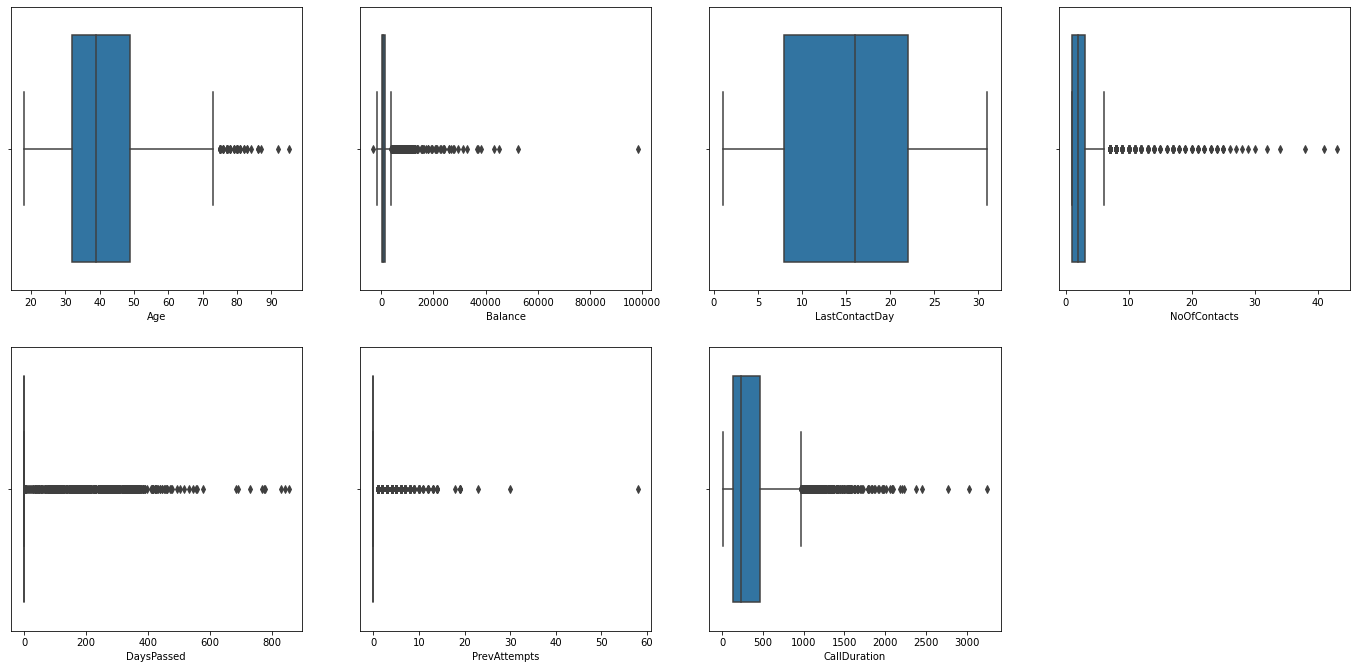

In [30]:
## Plot Boxplot For Numerical Columns to show distribution data & outliers value
df_outliers = df.drop(columns = ['Id', 'Job', 'Marital','Education', 'Default', 'HHInsurance', 'CarLoan', 'Communication', 'LastContactMonth', 'CallStart', 'CallEnd',
                                'CarInsurance'])

plt.figure(figsize =(24, 24))
x = 1 

for column in df_outliers.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

- Only LastContactDay don't have Outliers Value 
- This outliers will not be removed since it might be useful 

# DATA PREPARATION - FEATURES ENGINEERING

### FEATURES ENGINEERING FOR EDA

- Binning Age
- Binning Balance
- Binning LastContactDay
- Encode LastCondactDayMonth
- Binning NoOfContact
- Binning Call Duration Based On Average Call Duration

#### Binning Age

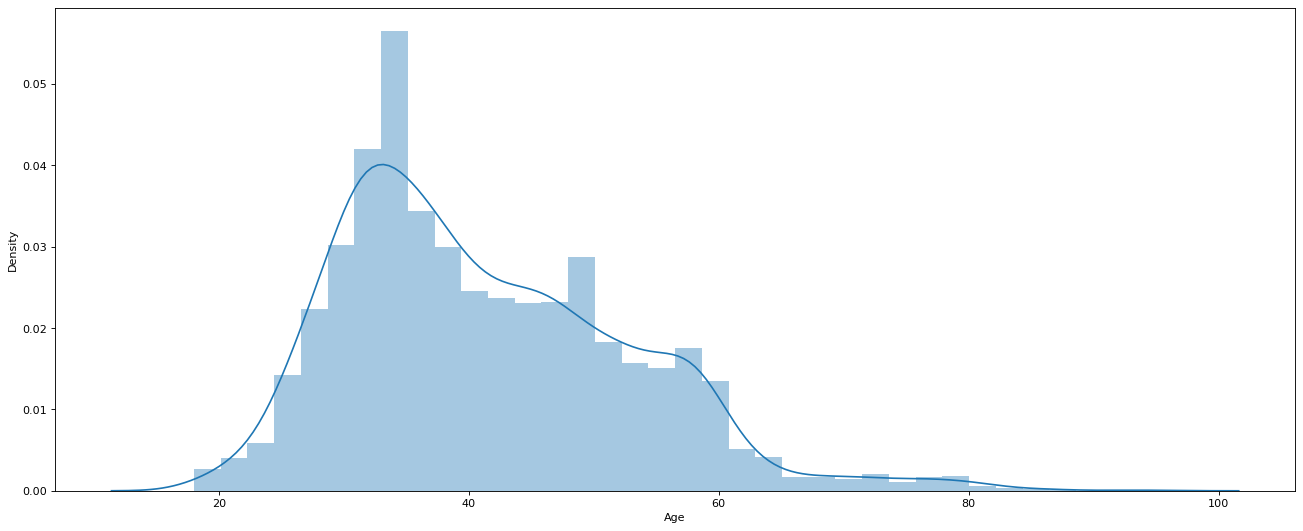

In [31]:
## Age Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['Age'])
plt.show()

In [32]:
age_bin = [17, 20, 30, 40, 50, 60, df['Age'].max()]
age_label = ['<=20 Years', '21-30 Years', '31-40 Years', '41-50 Years', '51-60 Years', '>61 Years']

df['age_group'] = pd.cut(df['Age'], bins = age_bin , labels = age_label)

#### Binning LastContactDay

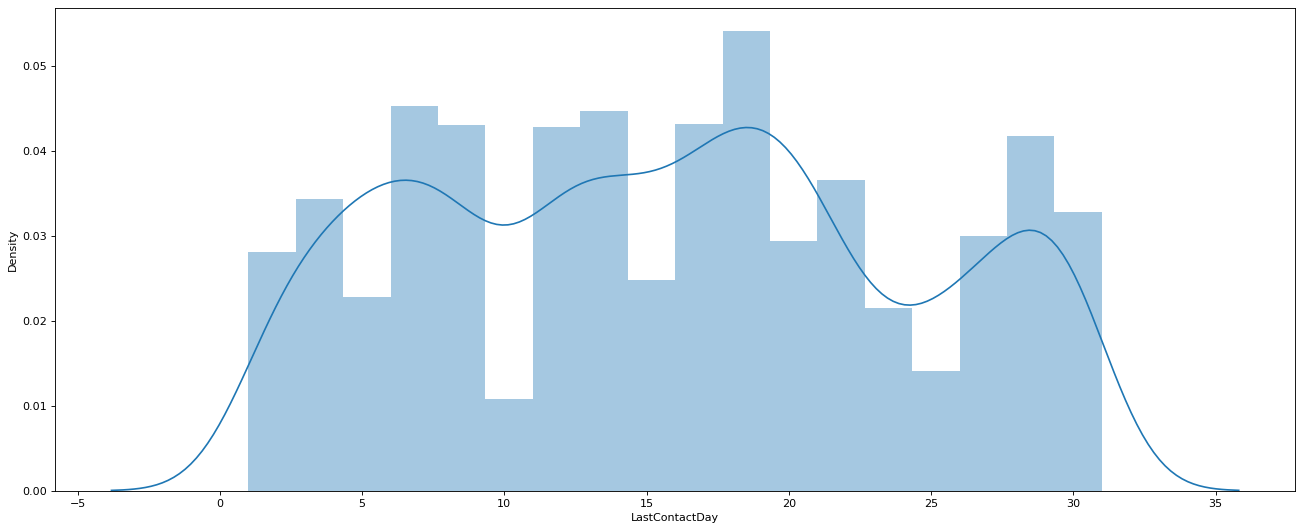

In [33]:
## LastContactDay Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['LastContactDay'])
plt.show()

In [34]:
day_bin = [0, 11, 21, df['LastContactDay'].max()]
day_label = ['Beginning of Month', 'Middle of Month', 'End of Month']

df['LastContactDayGroup'] = pd.cut(df['LastContactDay'], bins = day_bin , labels = day_label)

#### Encode Last Contact Month

In [35]:
df['LastContactMonth'].unique()

array(['jan', 'may', 'jun', 'mar', 'nov', 'jul', 'aug', 'sep', 'apr',
       'feb', 'oct', 'dec'], dtype=object)

In [36]:
df['LastContactMonth_Number'] = df['LastContactMonth'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                                                            'jul' : 7, 'aug' : 8, 'sep' :9, 'oct' : 10, 'nov' : 11, 'dec' : 12})

#### Binning NoOfContact

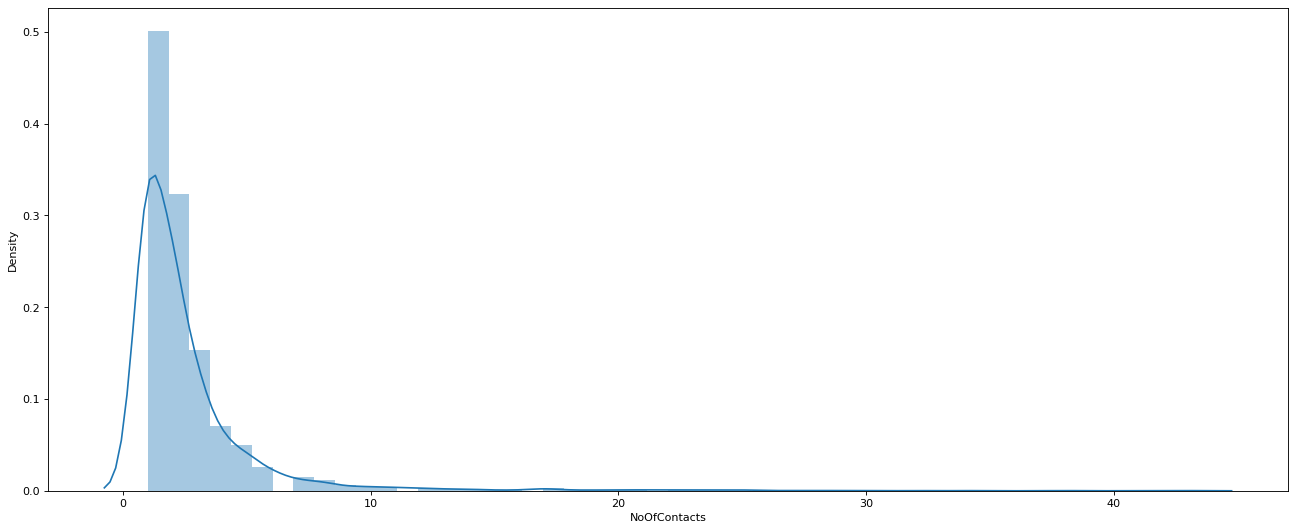

In [37]:
## Age NoOfContact Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['NoOfContacts'])
plt.show()

In [38]:
contacts_bin = [0, 1, 10, 20, 30, df['NoOfContacts'].max()]
contacts_label = ['One times', '1 - 10 times', '10 - 20 times', '20 - 30 times', '> 30 times']

df['NoOfContactsGroup'] = pd.cut(df['NoOfContacts'], bins = contacts_bin , labels = contacts_label)

#### Binning CallDuration

In [39]:
df['CallDuration'].mean()

350.844

In [40]:
df['CallDuration'].min()

5

In [41]:
callduration_bin = [0, df['CallDuration'].mean(), df['CallDuration'].max()]
callduration_label = ['Below Average CallDuration', 'Above Average CallDuration']

df['CallDurationGroup'] = pd.cut(df['CallDuration'], bins = callduration_bin , labels = callduration_label)

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

##### Initial Hypothesis 
- Age affect Customer's Acceptence of Car's Insurance Offering
- Job affect Customer's Acceptence of Car's Insurance Offering
- Marital affect Customer's Acceptence of Car's Insurance Offering
- Education affect Customer's Acceptence of Car's Insurance Offering
- Default Status affect Customer's Acceptence of Car's Insurance Offering
- Balance affect Customer's Acceptence of Car's Insurance Offering
- Having Insurance Status affect Customer's Acceptence of Car's Insurance Offering
- Having Car Loan Status affect Customer's Acceptence of Car's Insurance Offering
- Communication Method affect Customer's Acceptence of Car's Insurance Offering
- LastContactDay affect Customer's Acceptence of Car's Insurance Offering
- LastContactDay have same effect with LastContactMonth
- NoOfContact affect Customer's Acceptence of Car's Insurance Offering
- DayPast don't affect Customer's Acceptence of Car's Insurance Offering
- PrevAttempts don't affect Customer's Acceptence of Car's Insurance Offering
- Call Duration affect Customer's Acceptence of Car's Insurance Offering

### CORELLATION ANALYSIS

In [42]:
df.drop(columns=['CallStart', 'CallEnd'], inplace=True)

In [43]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration,age_group,LastContactDayGroup,LastContactMonth_Number,NoOfContactsGroup,CallDurationGroup
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0,70,31-40 Years,End of Month,1,1 - 10 times,Below Average CallDuration
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,0,185,31-40 Years,End of Month,5,1 - 10 times,Below Average CallDuration
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1,340,21-30 Years,Beginning of Month,6,One times,Below Average CallDuration
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1,819,21-30 Years,Beginning of Month,5,1 - 10 times,Above Average CallDuration
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0,192,21-30 Years,Beginning of Month,6,One times,Below Average CallDuration


### Association

In [44]:
df_aso = df.drop(columns = ['Id','Age', 'Age', 'Balance', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 
                            'PrevAttempts', 'CallDuration', 'age_group', 'LastContactDayGroup', 'NoOfContactsGroup', 'CallDurationGroup', 'LastContactMonth_Number'])

In [45]:
df_aso.head()

,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactMonth,CarInsurance
0,management,single,tertiary,0,1,0,telephone,jan,0
1,blue-collar,married,primary,0,1,0,cellular,may,0
2,management,single,tertiary,0,1,0,cellular,jun,1
3,student,single,primary,0,1,0,cellular,may,1
4,management,married,tertiary,0,0,0,cellular,jun,0


In [46]:
assoc_theils = []

for i in df_aso.columns:
    assoc = round(theils_u(df_aso['CarInsurance'], df[i]), 2)
    assoc_theils.append(assoc)

In [47]:
data_theils = pd.DataFrame(data = [assoc_theils], columns = df_aso.columns, index=['Exited'])

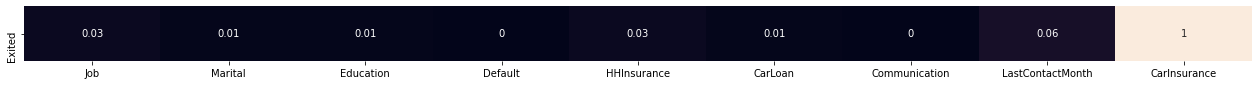

In [48]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_theils, annot=True, cbar=False)
plt.show()

### Correlation Ratio

In [49]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration,age_group,LastContactDayGroup,LastContactMonth_Number,NoOfContactsGroup,CallDurationGroup
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0,70,31-40 Years,End of Month,1,1 - 10 times,Below Average CallDuration
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,0,185,31-40 Years,End of Month,5,1 - 10 times,Below Average CallDuration
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1,340,21-30 Years,Beginning of Month,6,One times,Below Average CallDuration
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1,819,21-30 Years,Beginning of Month,5,1 - 10 times,Above Average CallDuration
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0,192,21-30 Years,Beginning of Month,6,One times,Below Average CallDuration


In [50]:
df_corat = df.drop(columns = ['Id', 'Job', 'Marital', 'Education', 'Default', 'HHInsurance', 'CarLoan', 'Communication', 'age_group', 
                              "LastContactMonth",'LastContactDayGroup', 'NoOfContactsGroup', 'CallDurationGroup', 'LastContactMonth_Number'])

In [51]:
df_corat.head()

,Age,Balance,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,1218,28,2,-1,0,0,70
1,32,1156,26,5,-1,0,0,185
2,29,637,3,1,119,1,1,340
3,25,373,11,2,-1,0,1,819
4,30,2694,3,1,-1,0,0,192


In [52]:
corat_list = []

for i in df_corat.columns:
    corat = round(correlation_ratio(df_corat['CarInsurance'], df[i]), 2)
    corat_list.append(corat)

In [53]:
data_corat = pd.DataFrame(data = [corat_list], columns = df_corat.columns, index=['Exited'])

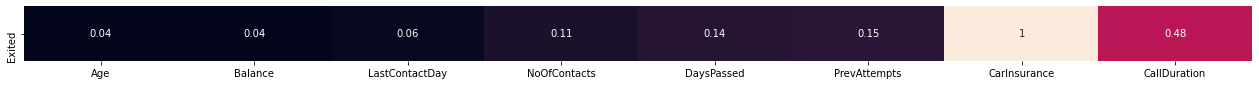

In [54]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_corat, annot=True, cbar=False)
plt.show()

In [55]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### Age

In [56]:
df['age_group'].value_counts()

31-40 Years    1499
41-50 Years     949
51-60 Years     684
21-30 Years     655
>61 Years       190
<=20 Years       23
Name: age_group, dtype: int64

In [57]:
df['age_group'].value_counts(normalize=True)

31-40 Years   0.37
41-50 Years   0.24
51-60 Years   0.17
21-30 Years   0.16
>61 Years     0.05
<=20 Years    0.01
Name: age_group, dtype: float64

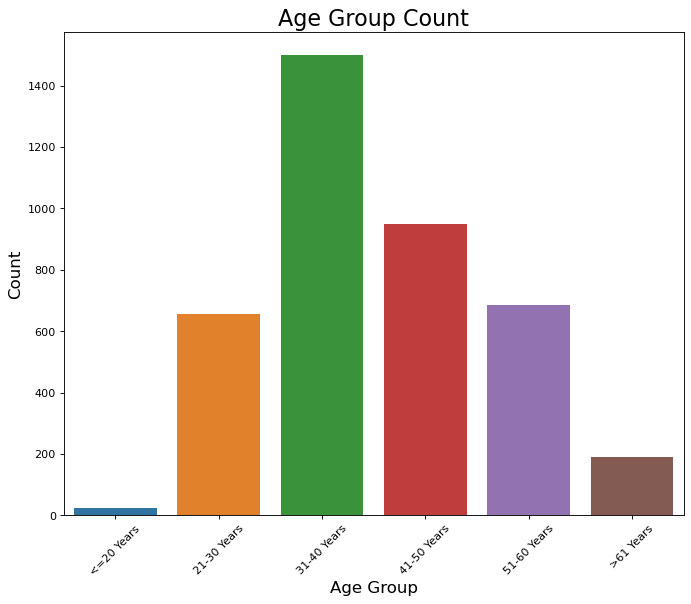

In [58]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['age_group'])
plt.title('Age Group Count', size =20)
plt.xlabel("Age Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority customers are 31-40 years old

#### Job

In [59]:
df['Job'].value_counts()

management       912
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [60]:
df['Job'].value_counts(normalize=True)

management      0.23
blue-collar     0.19
technician      0.17
admin.          0.11
services        0.08
retired         0.06
self-employed   0.04
student         0.03
unemployed      0.03
entrepreneur    0.03
housemaid       0.03
Name: Job, dtype: float64

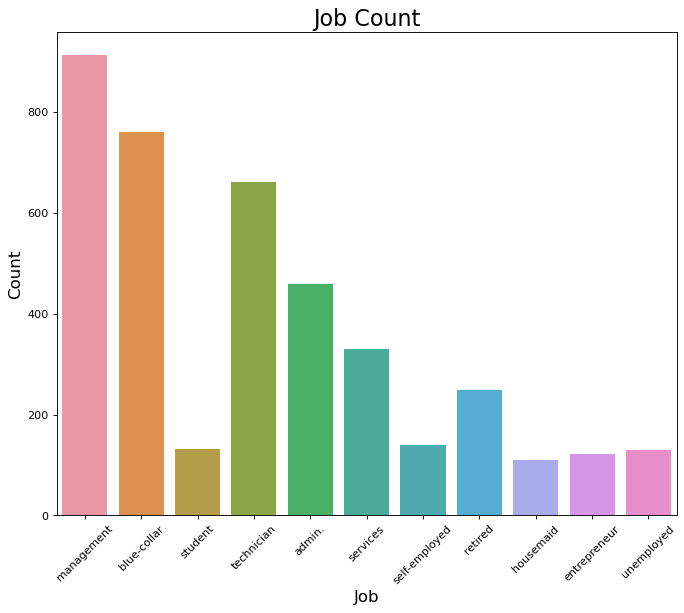

In [61]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Job'])
plt.title('Job Count', size =20)
plt.xlabel("Job",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customers work as management

#### Marital

In [62]:
df['Marital'].value_counts()

married     2304
single      1213
divorced     483
Name: Marital, dtype: int64

In [63]:
df['Marital'].value_counts(normalize=True)

married    0.58
single     0.30
divorced   0.12
Name: Marital, dtype: float64

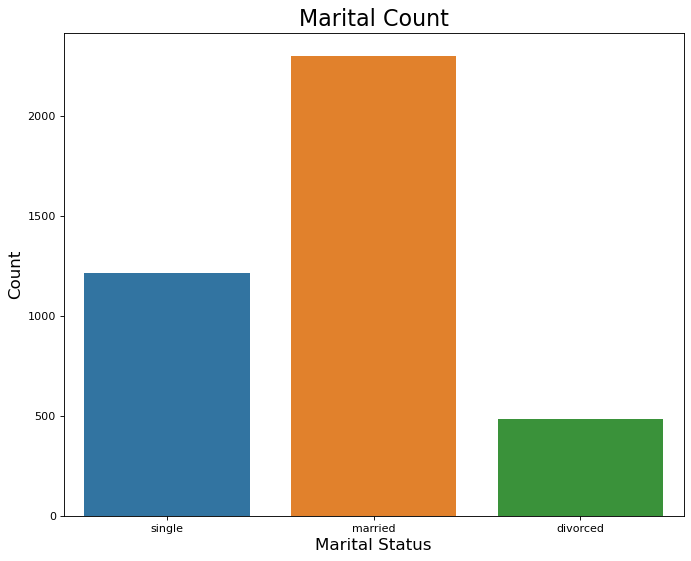

In [64]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Marital'])
plt.title('Marital Count', size =20)
plt.xlabel("Marital Status",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority customers are married

#### Education

In [65]:
df['Education'].value_counts()

secondary    2157
tertiary     1282
primary       561
Name: Education, dtype: int64

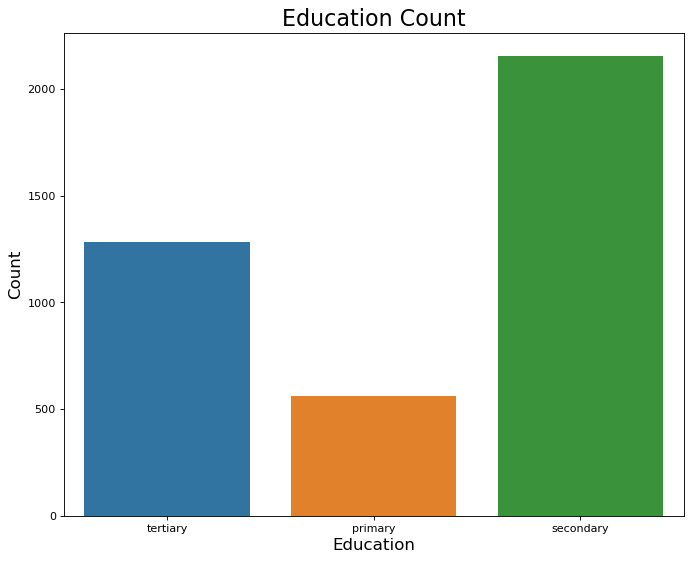

In [66]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Education'])
plt.title('Education Count', size =20)
plt.xlabel("Education",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Mostly customers education are secondary

#### Default

In [67]:
df['Default'].value_counts()

0    3942
1      58
Name: Default, dtype: int64

In [68]:
df['Default'].value_counts(normalize=True)

0   0.99
1   0.01
Name: Default, dtype: float64

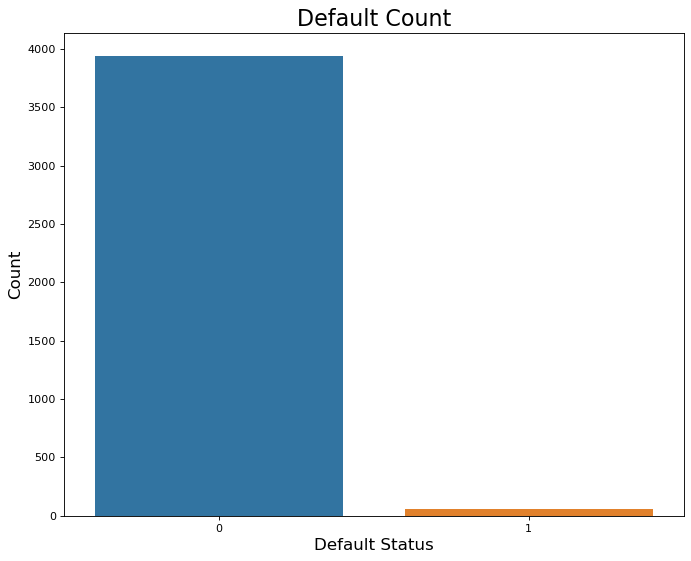

In [69]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Default'])
plt.title('Default Count', size =20)
plt.xlabel("Default Status",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority customers don't have credit default

#### House Hold Insurance Ownership

In [70]:
df['HHInsurance'].value_counts()

0    2029
1    1971
Name: HHInsurance, dtype: int64

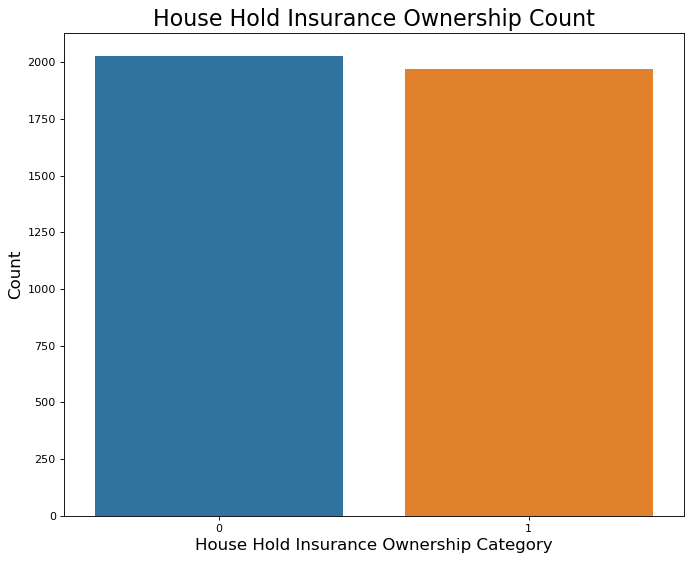

In [71]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['HHInsurance'])
plt.title('House Hold Insurance Ownership Count', size =20)
plt.xlabel("House Hold Insurance Ownership Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Half of Customers don't have House Hold insurance ownership and half of customers have House Hold Insurance ownership

#### Car Loan

In [72]:
df['CarLoan'].value_counts()

0    3468
1     532
Name: CarLoan, dtype: int64

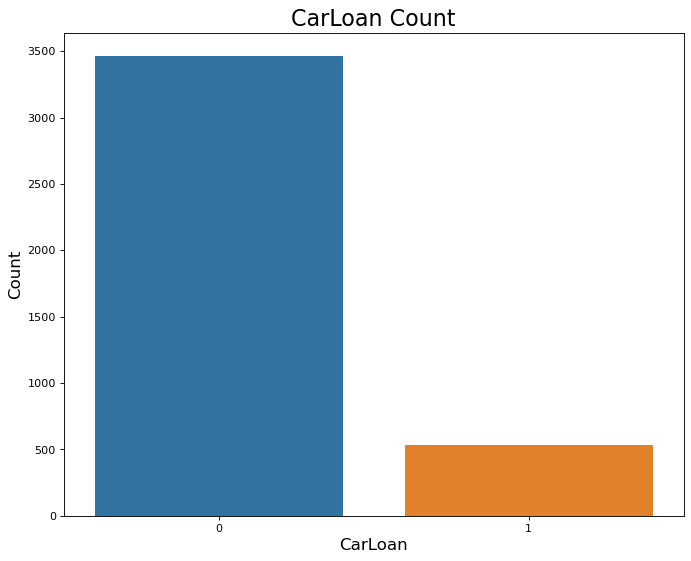

In [73]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CarLoan'])
plt.title('CarLoan Count', size =20)
plt.xlabel("CarLoan",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority customers don't have Car Loan 

#### Communication

In [74]:
df['Communication'].value_counts()

cellular     3733
telephone     267
Name: Communication, dtype: int64

In [75]:
df['Communication'].value_counts(normalize=True)

cellular    0.93
telephone   0.07
Name: Communication, dtype: float64

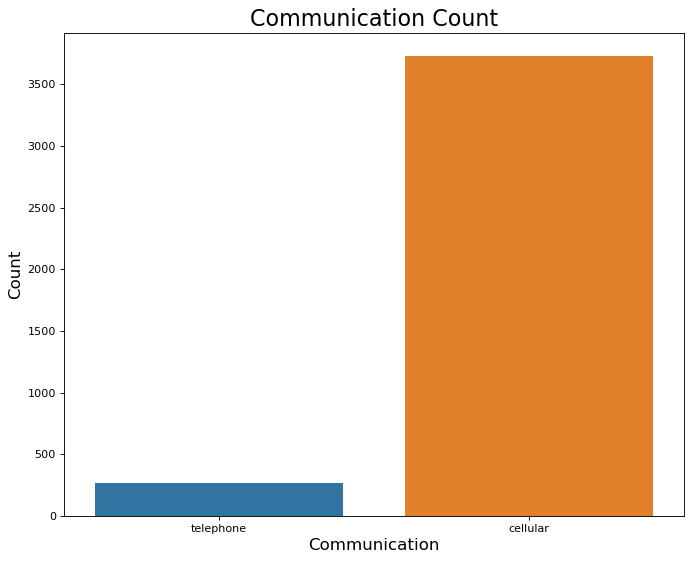

In [76]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Communication'])
plt.title('Communication Count', size =20)
plt.xlabel("Communication",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- 93% of customers is contacted via Cellular

#### LastContactDay

In [77]:
df['LastContactDayGroup'].value_counts()

Middle of Month       1614
Beginning of Month    1364
End of Month          1022
Name: LastContactDayGroup, dtype: int64

In [78]:
df['LastContactDayGroup'].value_counts(normalize=True)

Middle of Month      0.40
Beginning of Month   0.34
End of Month         0.26
Name: LastContactDayGroup, dtype: float64

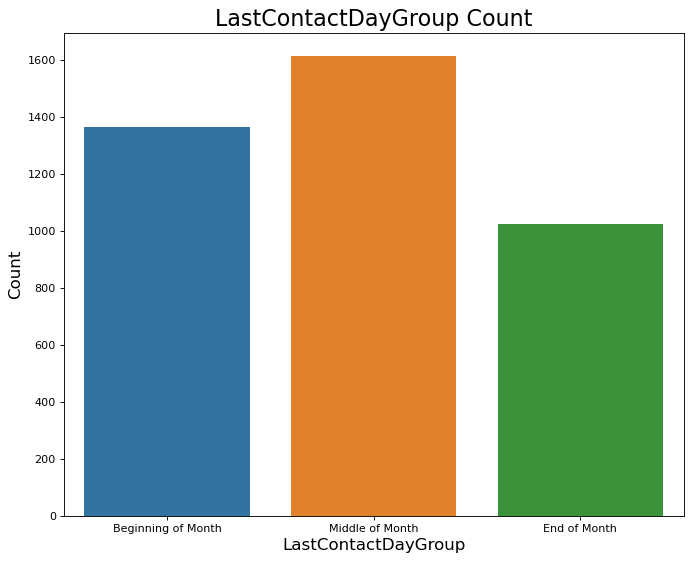

In [79]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['LastContactDayGroup'])
plt.title('LastContactDayGroup Count', size =20)
plt.xlabel("LastContactDayGroup",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most customers are last contacted by Marketing on the middle of month period

#### Last Contact Month

In [80]:
df['LastContactMonth'].value_counts()

may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: LastContactMonth, dtype: int64

In [81]:
df['LastContactMonth'].value_counts(normalize=True)

may   0.26
jul   0.14
aug   0.13
jun   0.11
nov   0.09
apr   0.08
feb   0.07
jan   0.03
oct   0.03
sep   0.03
mar   0.02
dec   0.01
Name: LastContactMonth, dtype: float64

- 26% customers are contacted on May 

#### NoOfContacts

In [82]:
df['NoOfContactsGroup'].value_counts()

1 - 10 times     2220
One times        1685
10 - 20 times      68
20 - 30 times      22
> 30 times          5
Name: NoOfContactsGroup, dtype: int64

In [83]:
df['NoOfContactsGroup'].value_counts(normalize=True)

1 - 10 times    0.56
One times       0.42
10 - 20 times   0.02
20 - 30 times   0.01
> 30 times      0.00
Name: NoOfContactsGroup, dtype: float64

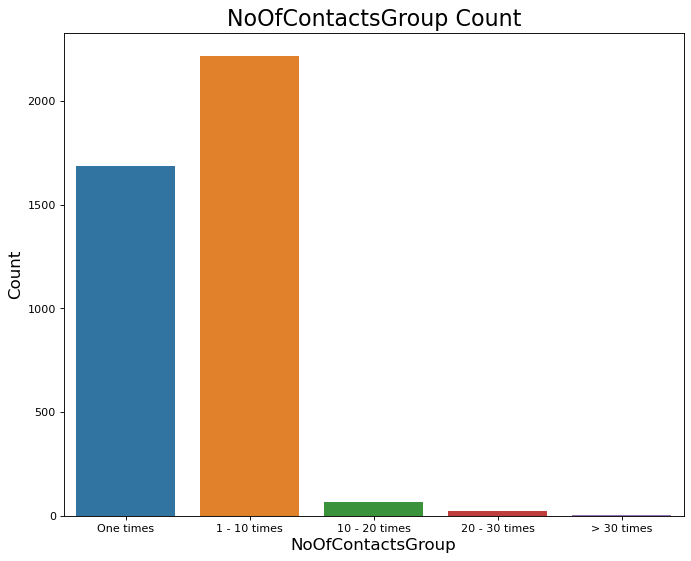

In [84]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['NoOfContactsGroup'])
plt.title('NoOfContactsGroup Count', size =20)
plt.xlabel("NoOfContactsGroup",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- 56% customers are contacted 1 - 10 times

#### CallDuration

In [85]:
df['CallDurationGroup'].value_counts()

Below Average CallDuration    2641
Above Average CallDuration    1359
Name: CallDurationGroup, dtype: int64

In [86]:
df['CallDurationGroup'].value_counts(normalize=True)

Below Average CallDuration   0.66
Above Average CallDuration   0.34
Name: CallDurationGroup, dtype: float64

- 66% customers are call below average Call Duration Time

#### Communication

In [87]:
df['Communication'].value_counts()

cellular     3733
telephone     267
Name: Communication, dtype: int64

In [88]:
df['Communication'].value_counts(normalize=True)

cellular    0.93
telephone   0.07
Name: Communication, dtype: float64

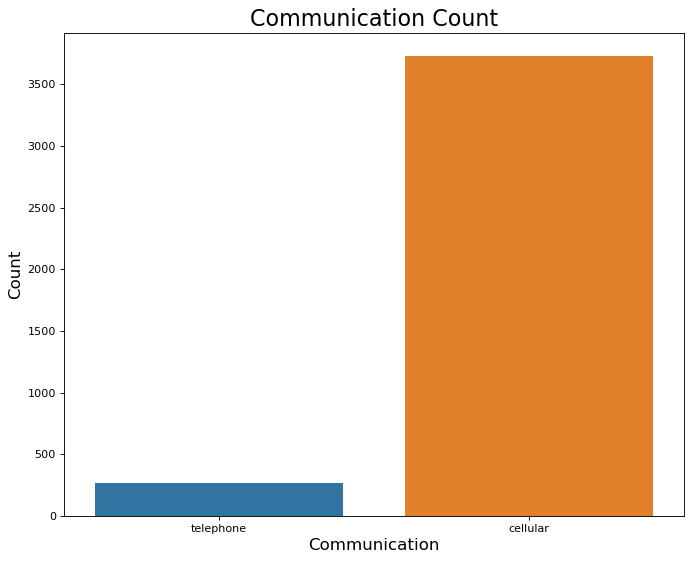

In [89]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Communication'])
plt.title('Communication Count', size =20)
plt.xlabel("Communication",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- 93% of customers is contacted via Cellular

#### Car Insurance Acceptance

In [90]:
df['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

In [91]:
df['CarInsurance'].value_counts(normalize=True)

0   0.60
1   0.40
Name: CarInsurance, dtype: float64

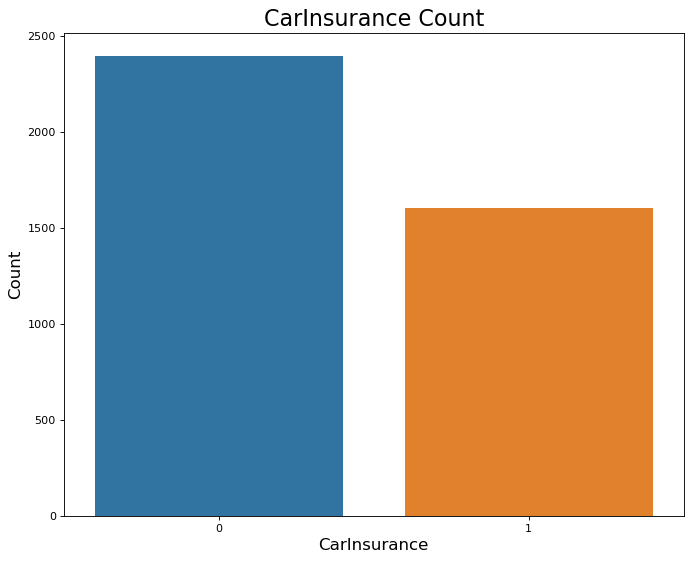

In [92]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CarInsurance'])
plt.title('CarInsurance Count', size =20)
plt.xlabel("CarInsurance",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Only 40 percent customers accept car insurance offer

### MULTIVARIATE ANALYSIS

#### Age Group VS Car Insurance Offer Acceptence

In [93]:
df_age = df.pivot_table(index='age_group', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending = False).reset_index()
df_age

,age_group,CarInsurance
0,31-40 Years,544
1,41-50 Years,331
2,21-30 Years,313
3,51-60 Years,250
4,>61 Years,150
5,<=20 Years,16


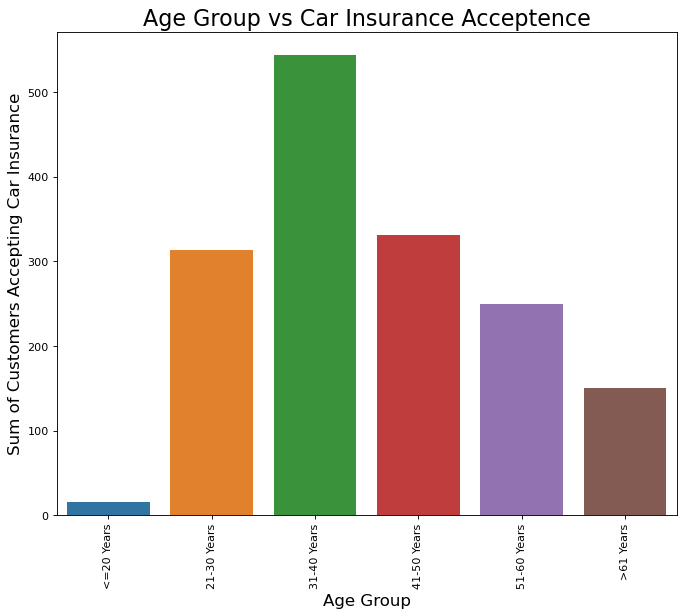

In [94]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'age_group' , y = 'CarInsurance', data = df_age, estimator=sum)
plt.title('Age Group vs Car Insurance Acceptence', size =20)
plt.xlabel("Age Group", size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.xticks(rotation=90)
plt.show()

In [95]:
pd.crosstab(index = df['age_group'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
age_group,,
<=20 Years,0.30,0.70
21-30 Years,0.52,0.48
31-40 Years,0.64,0.36
41-50 Years,0.65,0.35
51-60 Years,0.63,0.37
>61 Years,0.21,0.79


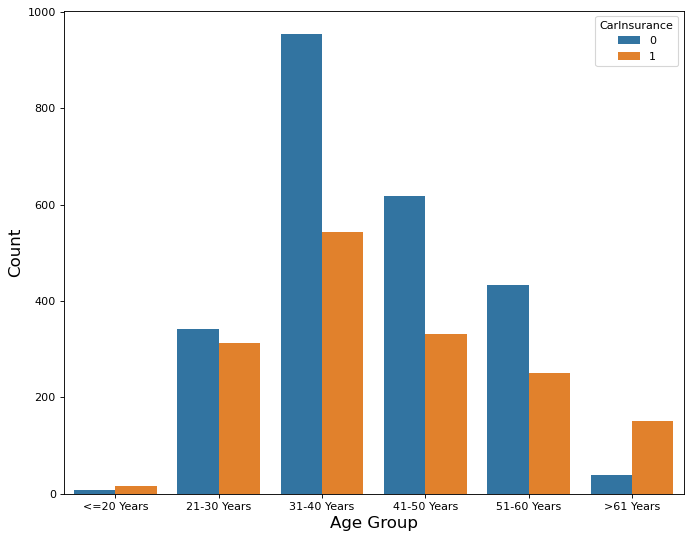

In [96]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('age_group', data = df, hue = 'CarInsurance')
plt.xlabel("Age Group",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Customers in 31-40 Years are the most Age Group accepting Car Insurance Offering, but they also have big contribution to Car Insurance Rejection (64%)
- Customers in <= 20 Years and > 61 Years age group have the biggest percentage in accepting Car Insurance Offer
- Customers in 31-40 Years, 41-50 Years, and 51-60 Years age group have the biggest percentage in Rejecting Car Insurance Offer

#### Job VS Car Insurance Offer Acceptence

In [97]:
df_job = df.pivot_table(index='Job', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending = False).reset_index()
df_job

,Job,CarInsurance
0,management,401
1,technician,254
2,blue-collar,219
3,admin.,185
4,retired,146
5,services,112
6,student,87
7,unemployed,74
8,self-employed,54
9,housemaid,37


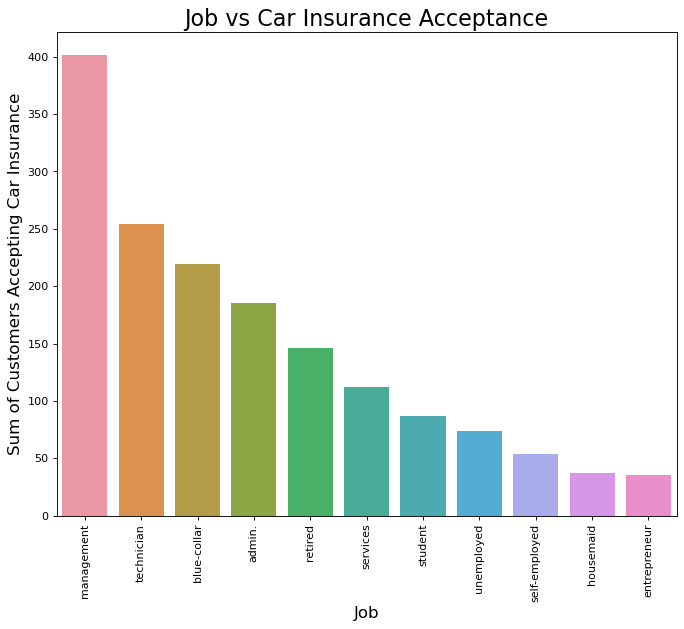

In [98]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Job' , y = 'CarInsurance', data = df_job, estimator=sum)
plt.title('Job vs Car Insurance Acceptance', size =20)
plt.xlabel("Job",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.xticks(rotation=90)
plt.show()

In [99]:
pd.crosstab(index = df['Job'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
Job,,
admin.,0.60,0.40
blue-collar,0.71,0.29
entrepreneur,0.71,0.29
housemaid,0.66,0.34
management,0.56,0.44
retired,0.41,0.59
self-employed,0.61,0.39
services,0.66,0.34
student,0.34,0.66


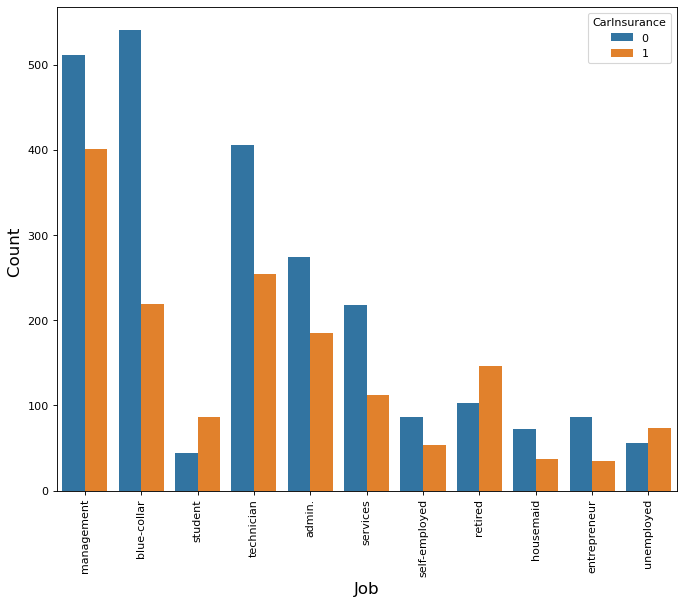

In [100]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Job', data = df, hue = 'CarInsurance')
plt.xlabel("Job",size = 15)
plt.ylabel("Count ", size = 15)
plt.xticks(rotation=90)
plt.show()

- Most of customers accepting Car Insurance Offer work as Managemement
- Customers who works as Retired, Student, and Unemployed have the biggest percentage in accepting Car Insurance Offer

#### Marital VS Car Insurance Offer Acceptence

In [101]:
df_marital = df.pivot_table(index='Marital', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending = False).reset_index()
df_marital

,Marital,CarInsurance
0,married,833
1,single,561
2,divorced,210


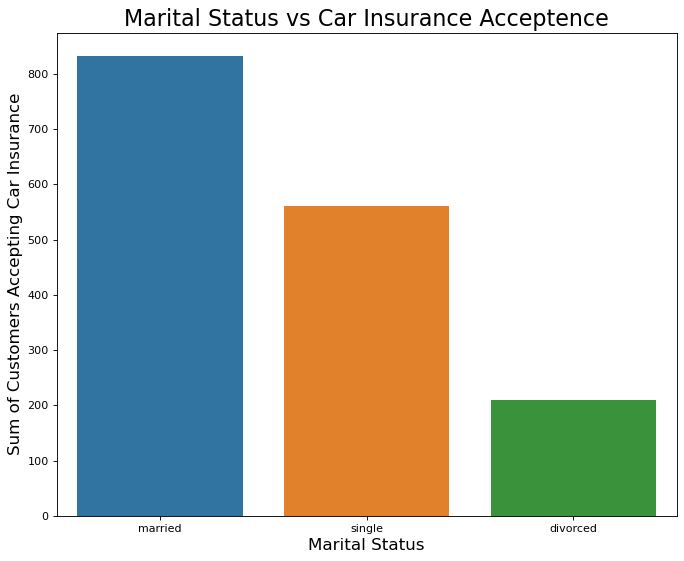

In [102]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Marital' , y = 'CarInsurance', data = df_marital, estimator=sum)
plt.title('Marital Status vs Car Insurance Acceptence', size =20)
plt.xlabel("Marital Status",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [103]:
pd.crosstab(index = df['Marital'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
Marital,,
divorced,0.57,0.43
married,0.64,0.36
single,0.54,0.46


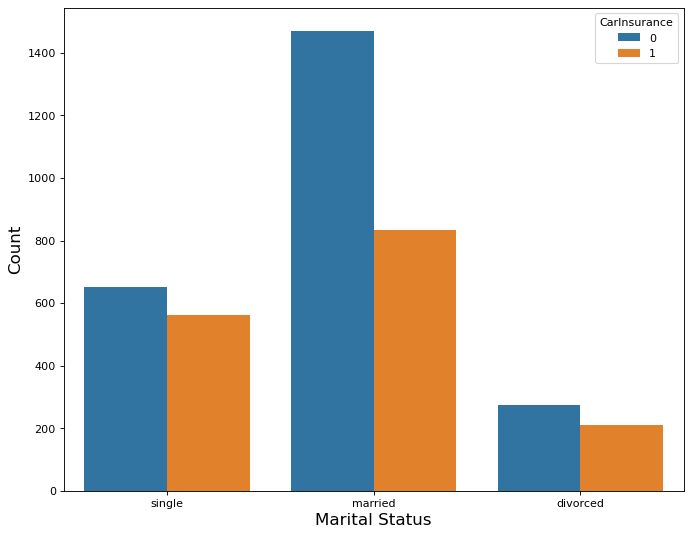

In [104]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Marital', data = df, hue = 'CarInsurance')
plt.xlabel("Marital Status",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance are Married
- Customers who are single have the biggest percentage in accepting Car Insurance Offer

#### Education VS Car Insurance Offer Acceptence

In [105]:
df_education = df.pivot_table(index='Education', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_education

,Education,CarInsurance
0,secondary,809
1,tertiary,600
2,primary,195


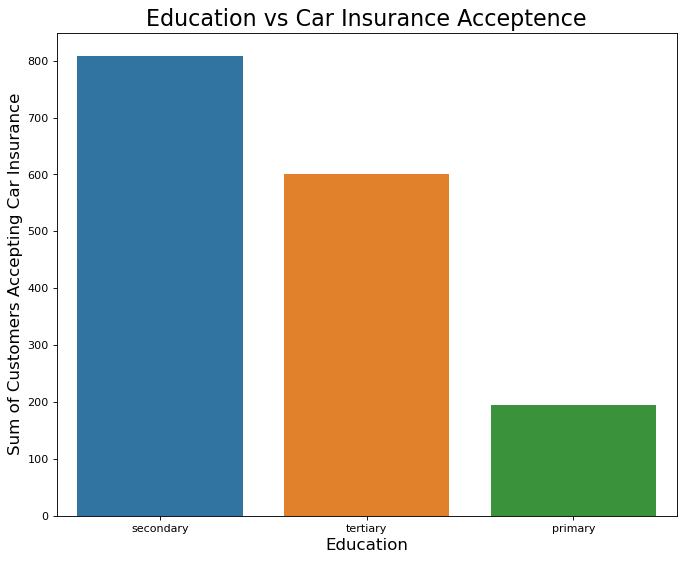

In [106]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Education' , y = 'CarInsurance', data = df_education, estimator=sum)
plt.title('Education vs Car Insurance Acceptence', size =20)
plt.xlabel("Education",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [107]:
pd.crosstab(index = df['Education'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
Education,,
primary,0.65,0.35
secondary,0.62,0.38
tertiary,0.53,0.47


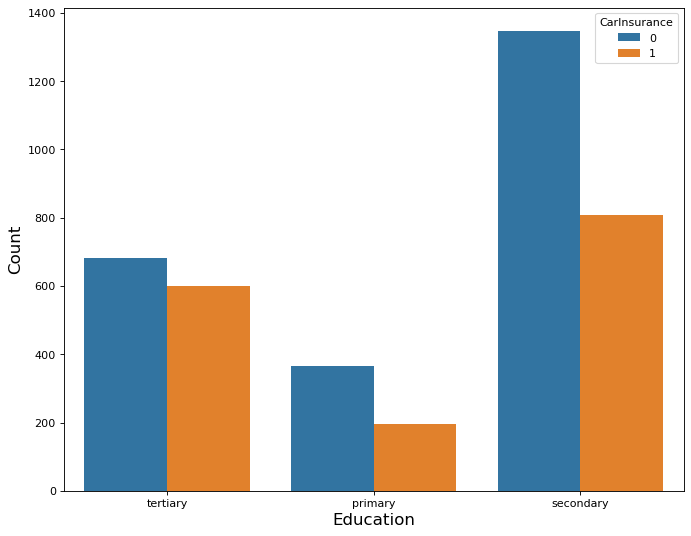

In [108]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Education', data = df, hue = 'CarInsurance')
plt.xlabel("Education",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance are Secondary Education, but there are more rejectors
- Customers who are Tertiary Education have the biggest percentage in accepting Car Insurance Offer

#### Default VS Car Insurance Offer Acceptence

In [109]:
df_default = df.pivot_table(index='Default', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_default

,Default,CarInsurance
0,0,1590
1,1,14


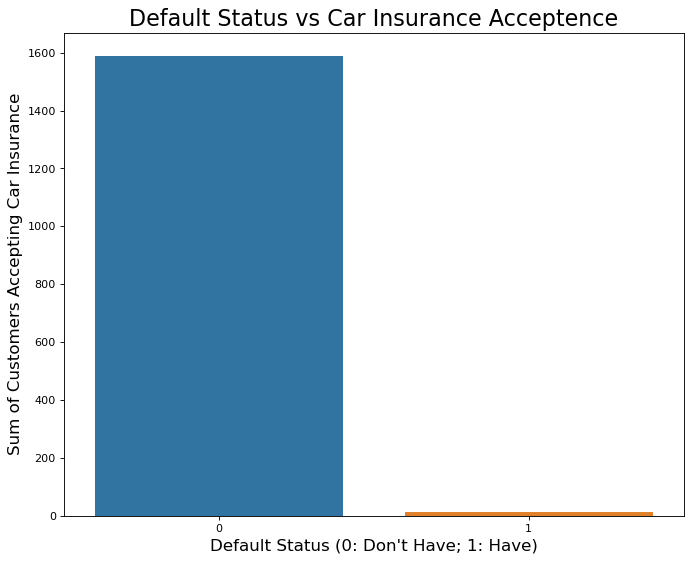

In [110]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Default' , y = 'CarInsurance', data = df_default, estimator=sum)
plt.title('Default Status vs Car Insurance Acceptence', size =20)
plt.xlabel("Default Status (0: Don't Have; 1: Have)",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [111]:
pd.crosstab(index = df['Default'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
Default,,
0,0.60,0.40
1,0.76,0.24


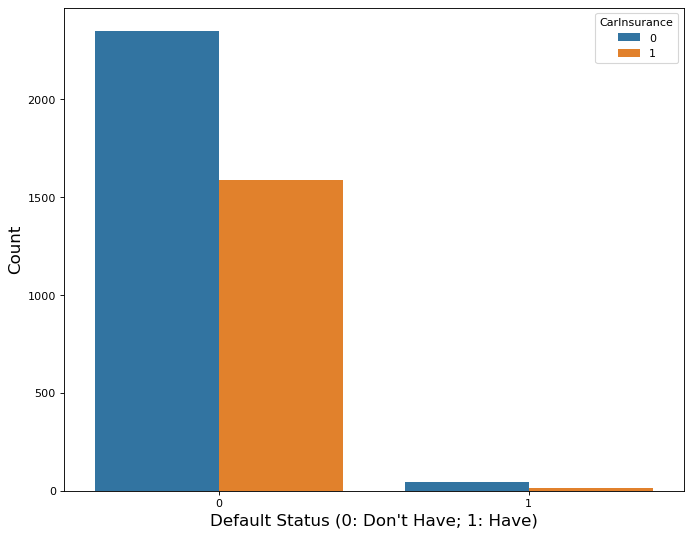

In [112]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Default', data = df, hue = 'CarInsurance')
plt.xlabel("Default Status (0: Don't Have; 1: Have)",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance don't have credit in default
- Customers who have credit in have the biggest percentage in rejecting Car Insurance Offer (tend to reject)

#### Car Insurance Acceptence vs Balance

In [113]:
df_balance = df.pivot_table(index='CarInsurance', values='Balance', aggfunc='mean').sort_values('Balance', ascending=False).reset_index()
df_balance

,CarInsurance,Balance
0,1,1711.28
1,0,1413.54


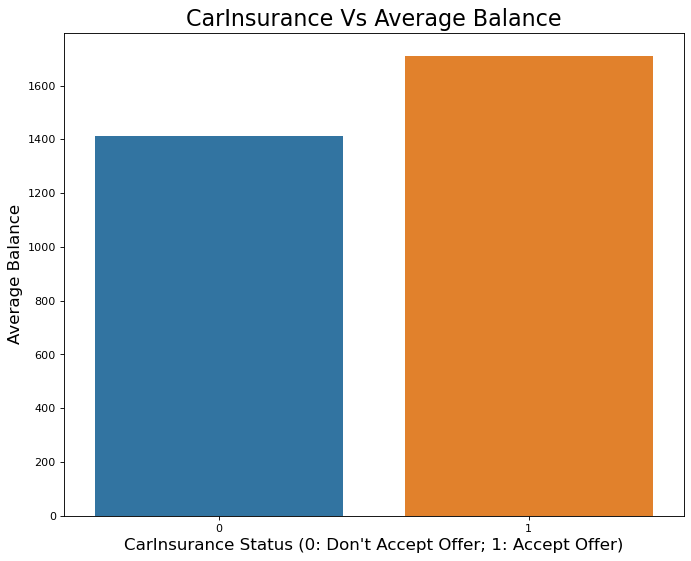

In [114]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'CarInsurance' , y = 'Balance', data = df_balance, estimator=sum)
plt.title('CarInsurance Vs Average Balance', size =20)
plt.xlabel("CarInsurance Status (0: Don't Accept Offer; 1: Accept Offer)",size = 15)
plt.ylabel("Average Balance", size = 15)
plt.show()

- Customers accepting Car Insurance offer have higher balance average

#### Having HouseHold Insurance VS Car Insurance Offer Acceptence

In [115]:
df_hi = df.pivot_table(index='HHInsurance', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_hi

,HHInsurance,CarInsurance
0,0,1013
1,1,591


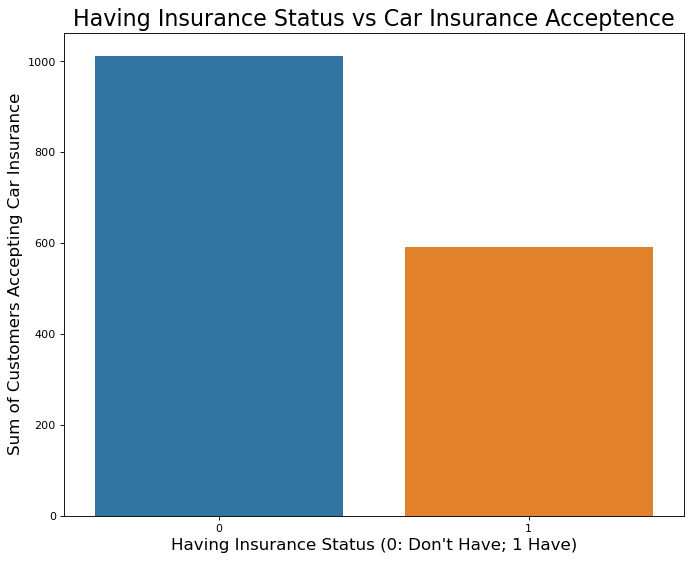

In [116]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'HHInsurance' , y = 'CarInsurance', data = df_hi, estimator=sum)
plt.title('Having Insurance Status vs Car Insurance Acceptence', size =20)
plt.xlabel("Having Insurance Status (0: Don't Have; 1 Have)",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [117]:
pd.crosstab(index = df['HHInsurance'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
HHInsurance,,
0,0.50,0.50
1,0.70,0.30


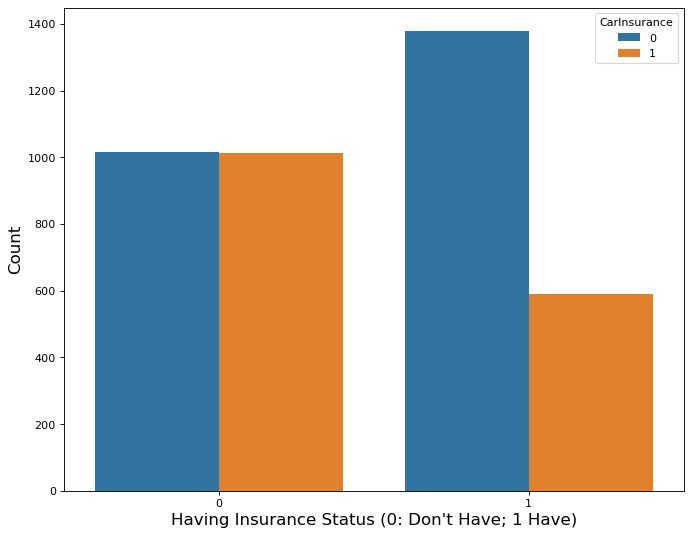

In [118]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('HHInsurance', data = df, hue = 'CarInsurance')
plt.xlabel("Having Insurance Status (0: Don't Have; 1 Have)",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer don't have House Hold Insurance
- Customers who have House Hold Insurance have the biggest percentage in rejecting Car Insurance Offer

#### Having Car Loan VS Car Insurance Offer Acceptence

In [119]:
df_cl = df.pivot_table(index='CarLoan', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_cl

,CarLoan,CarInsurance
0,0,1452
1,1,152


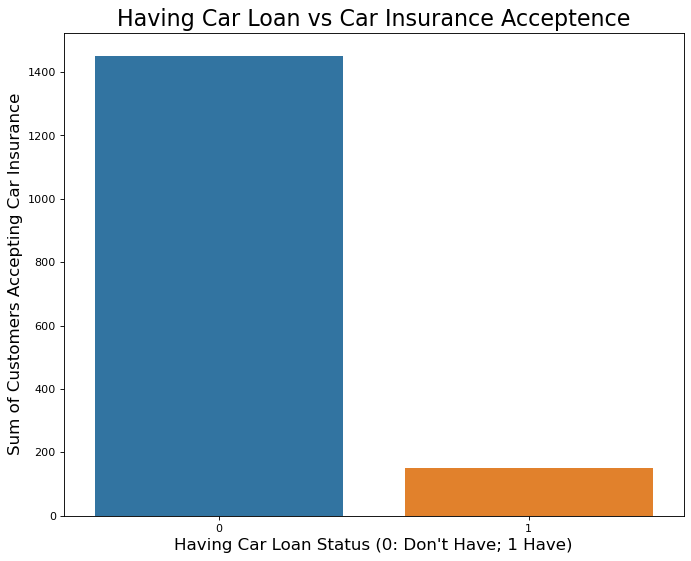

In [120]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'CarLoan' , y = 'CarInsurance', data = df_cl, estimator=sum)
plt.title('Having Car Loan vs Car Insurance Acceptence', size =20)
plt.xlabel("Having Car Loan Status (0: Don't Have; 1 Have)",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [121]:
pd.crosstab(index = df['CarLoan'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
CarLoan,,
0,0.58,0.42
1,0.71,0.29


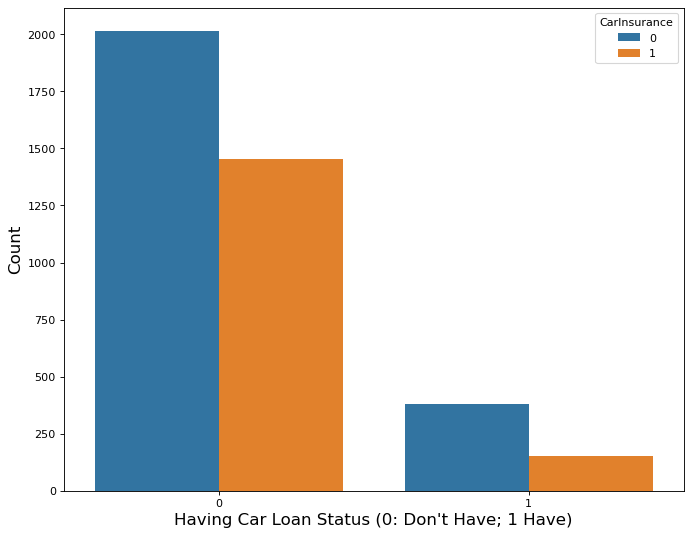

In [122]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('CarLoan', data = df, hue = 'CarInsurance')
plt.xlabel("Having Car Loan Status (0: Don't Have; 1 Have)",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer don't have Car Loan
- Customers who have Car Loan have the biggest percentage in rejecting Car Insurance Offer

#### Communication Method VS Car Insurance Offer Acceptence

In [123]:
df_com = df.pivot_table(index='Communication', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_com

,Communication,CarInsurance
0,cellular,1481
1,telephone,123


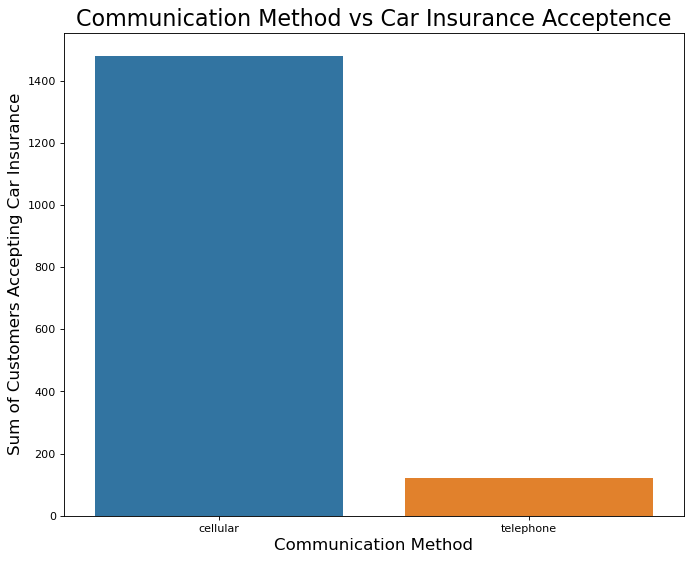

In [124]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Communication' , y = 'CarInsurance', data = df_com, estimator=sum)
plt.title('Communication Method vs Car Insurance Acceptence', size =20)
plt.xlabel("Communication Method",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [125]:
pd.crosstab(index = df['Communication'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
Communication,,
cellular,0.60,0.40
telephone,0.54,0.46


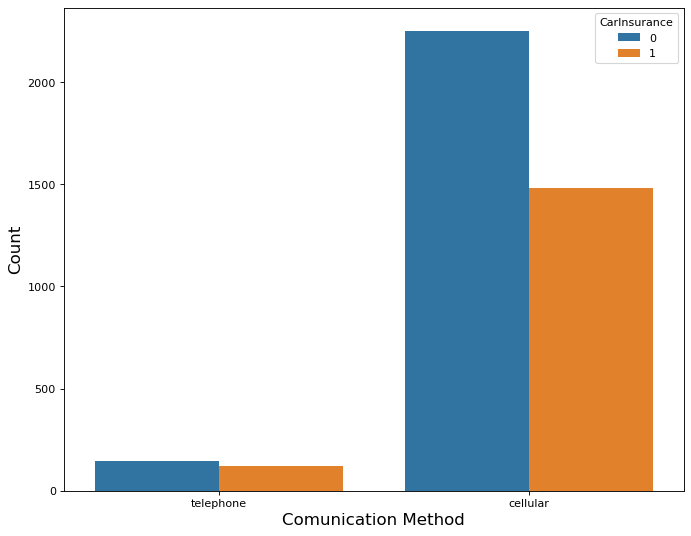

In [126]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('Communication', data = df, hue = 'CarInsurance')
plt.xlabel("Comunication Method",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer are contacted via Cellular
- All communication method have similiar percentace of customers accepting Car Insurance Offer

#### Last Contact Day VS Car Insurance Offer Acceptence

In [127]:
df_cd = df.pivot_table(index='LastContactDayGroup', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_cd

,LastContactDayGroup,CarInsurance
0,Middle of Month,624
1,Beginning of Month,580
2,End of Month,400


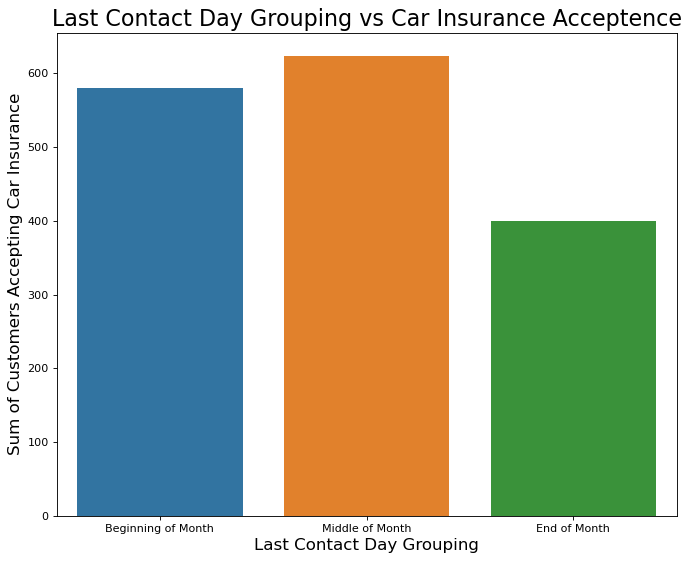

In [128]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'LastContactDayGroup' , y = 'CarInsurance', data = df_cd, estimator=sum)
plt.title('Last Contact Day Grouping vs Car Insurance Acceptence', size =20)
plt.xlabel("Last Contact Day Grouping",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [129]:
pd.crosstab(index = df['LastContactDayGroup'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
LastContactDayGroup,,
Beginning of Month,0.57,0.43
Middle of Month,0.61,0.39
End of Month,0.61,0.39


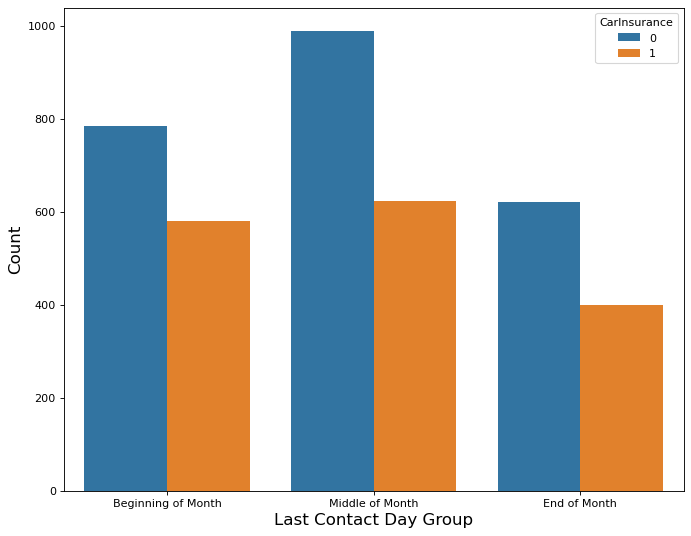

In [130]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('LastContactDayGroup', data = df, hue = 'CarInsurance')
plt.xlabel("Last Contact Day Group",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer when is last contacted time in the Middle Of Month
- All Last Contact Day Group Period have similar percentage of customers accepting Car Insurance Offer

#### Last Contact Month VS Car Insurance Offer Acceptence

In [131]:
df_cd = df.pivot_table(index='LastContactMonth', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_cd

,LastContactMonth,CarInsurance
0,may,289
1,jul,209
2,aug,194
3,jun,171
4,apr,156
5,feb,133
6,nov,132
7,oct,91
8,sep,83
9,mar,64


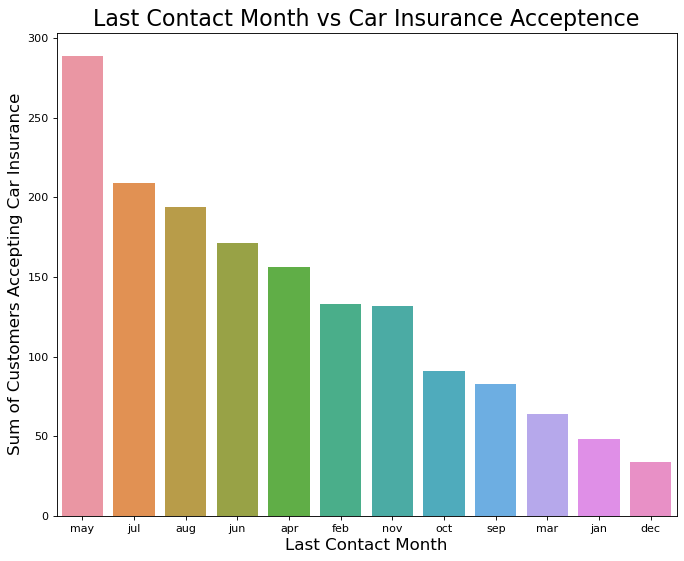

In [132]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'LastContactMonth' , y = 'CarInsurance', data = df_cd, estimator=sum)
plt.title('Last Contact Month vs Car Insurance Acceptence', size =20)
plt.xlabel("Last Contact Month",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [133]:
pd.crosstab(index = df['LastContactMonth'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
LastContactMonth,,
apr,0.49,0.51
aug,0.64,0.36
dec,0.17,0.83
feb,0.49,0.51
jan,0.64,0.36
jul,0.64,0.36
jun,0.62,0.38
mar,0.19,0.81
may,0.72,0.28


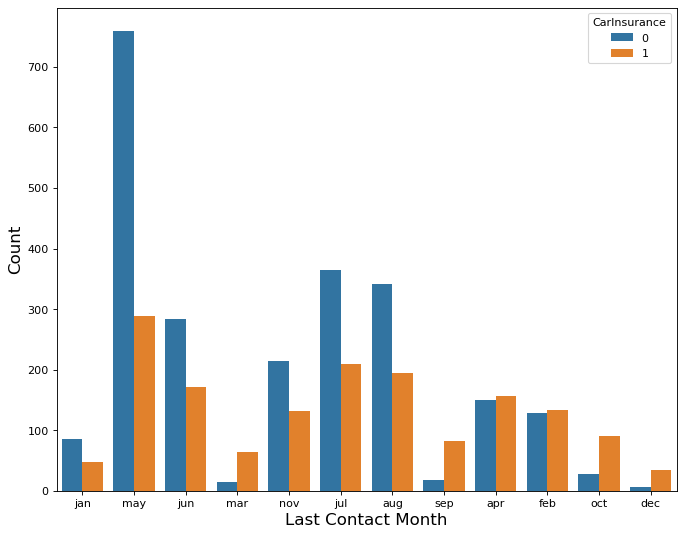

In [134]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('LastContactMonth', data = df, hue = 'CarInsurance')
plt.xlabel("Last Contact Month",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer when are last contacted month is May
- Cutomers who are last contacted Month in March, September, October, December have the the biggest percentage in Accepting Car Insurance Offer

#### Number Of Contacts Group VS Car Insurance Offer Acceptence

In [135]:
df_contact = df.pivot_table(index='NoOfContactsGroup', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_contact

,NoOfContactsGroup,CarInsurance
0,1 - 10 times,814
1,One times,773
2,10 - 20 times,14
3,20 - 30 times,3
4,> 30 times,0


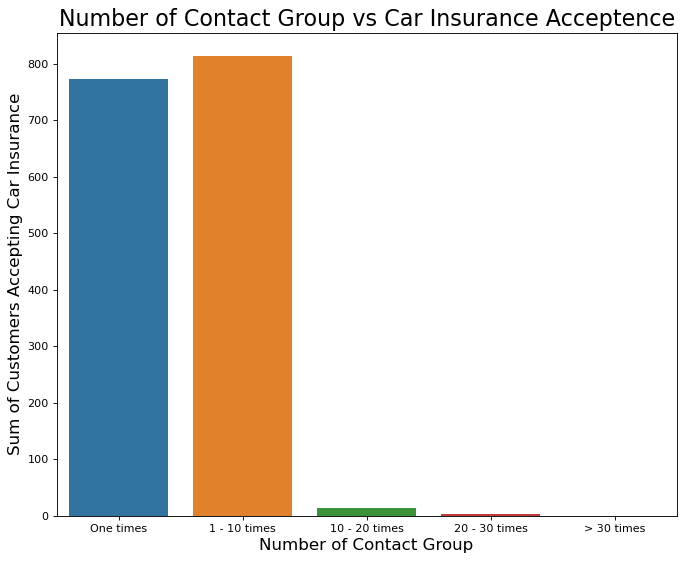

In [136]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'NoOfContactsGroup' , y = 'CarInsurance', data = df_contact, estimator=sum)
plt.title('Number of Contact Group vs Car Insurance Acceptence', size =20)
plt.xlabel("Number of Contact Group",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [137]:
pd.crosstab(index = df['NoOfContactsGroup'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
NoOfContactsGroup,,
One times,0.54,0.46
1 - 10 times,0.63,0.37
10 - 20 times,0.79,0.21
20 - 30 times,0.86,0.14
> 30 times,1.00,0.00


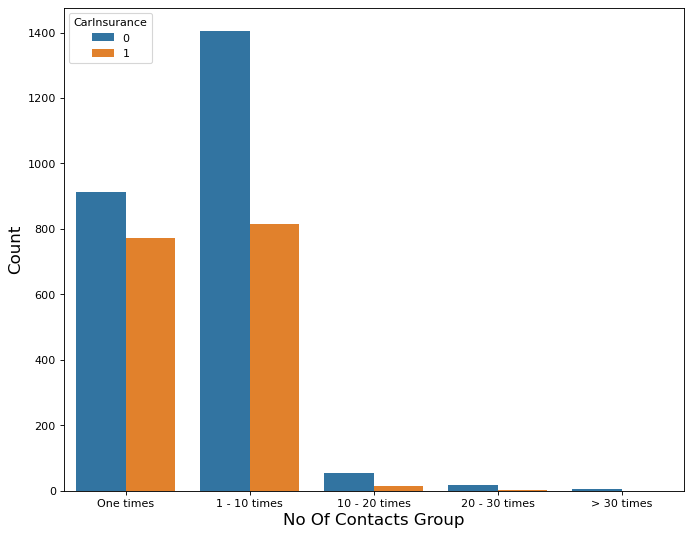

In [138]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('NoOfContactsGroup', data = df, hue = 'CarInsurance')
plt.xlabel("No Of Contacts Group",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer when they are contacted 1-10 times
- When contacted just once, almost 46% of them have accept car insurance offer
- When contated more than 10 times, percentage of customer rejecting Car Insurance Offer are bigger

#### Call Duration Group VS Car Insurance Offer Acceptence

In [139]:
df_duration = df.pivot_table(index='CallDurationGroup', values='CarInsurance', aggfunc='sum').sort_values('CarInsurance', ascending=False).reset_index()
df_duration

,CallDurationGroup,CarInsurance
0,Above Average CallDuration,968
1,Below Average CallDuration,636


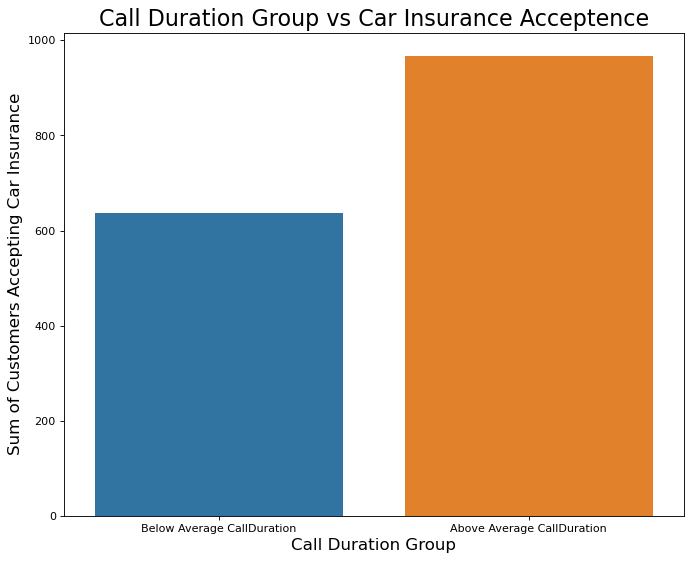

In [140]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'CallDurationGroup' , y = 'CarInsurance', data = df_duration, estimator=sum)
plt.title('Call Duration Group vs Car Insurance Acceptence', size =20)
plt.xlabel("Call Duration Group",size = 15)
plt.ylabel("Sum of Customers Accepting Car Insurance", size = 15)
plt.show()

In [141]:
pd.crosstab(index = df['CallDurationGroup'], columns = df['CarInsurance'], normalize = 'index')

CarInsurance,0,1
CallDurationGroup,,
Below Average CallDuration,0.76,0.24
Above Average CallDuration,0.29,0.71


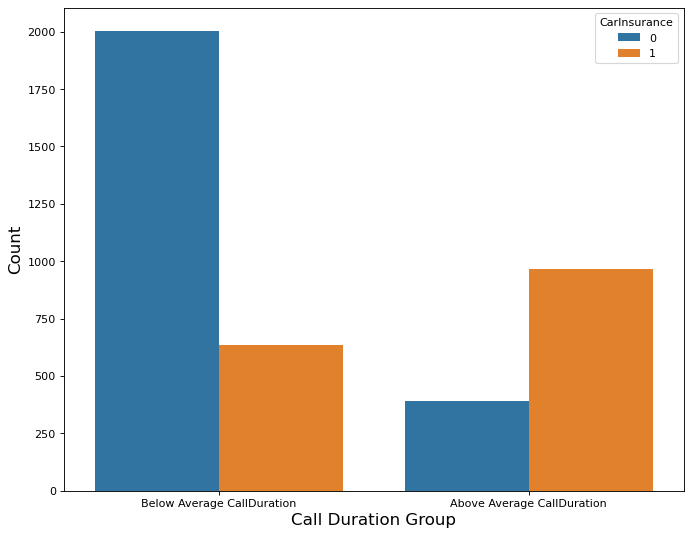

In [142]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('CallDurationGroup', data = df, hue = 'CarInsurance')
plt.xlabel("Call Duration Group",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Most of customers accepting Car Insurance Offer when they are being contacted Above Average CallDuration
- When customers are being contacted Below Average Call Duration, rejecting Car Insurance Offer is bigger

# DATA INSIGHT

- Majority customers are 31-40 years old
- Most of customers work as management
- Majority customers are married
- Mostly customers education are secondary
- Majority customers don't have credit default
- Half of Customers don't have House Hold insurance ownership and half of customers have House Hold Insurance ownership
- Majority customers don't have Car Loan 
- 93% of customers is contacted via Cellular
- Most customers are last contacted by Marketing on the middle of month period
- 26% customers are contacted on May 
- 56% customers are contacted 1 - 10 times
- 66% customers are call below average Call Duration Time
- 93% of customers is contacted via Cellular
- Only 40 percent customers accept car insurance offer
- Customers in 31-40 Years are the most Age Group accepting Car Insurance Offering, but they also have big contribution to Car Insurance Rejection (64%)
- Customers in <= 20 Years and > 61 Years age group have the biggest percentage in accepting Car Insurance Offer
- Customers in 31-40 Years, 41-50 Years, and 51-60 Years age group have the biggest percentage in Rejecting Car Insurance Offer
- Most of customers accepting Car Insurance Offer work as Managemement
- Customers who works as Retired, Student, and Unemployed have the biggest percentage in accepting Car Insurance Offer
- Most of customers accepting Car Insurance are Married
- Customers who are single have the biggest percentage in accepting Car Insurance Offer
- Most of customers accepting Car Insurance are Secondary Education, but there are more rejectors
- Customers who are Tertiary Education have the biggest percentage in accepting Car Insurance Offer
- Most of customers accepting Car Insurance don't have credit in default
- Customers who have credit in have the biggest percentage in rejecting Car Insurance Offer (tend to reject)
- Customers accepting Car Insurance offer have higher balance average
- Most of customers accepting Car Insurance Offer don't have House Hold Insurance
- Customers who have House Hold Insurance have the biggest percentage in rejecting Car Insurance Offer
- Most of customers accepting Car Insurance Offer don't have Car Loan
- Customers who have Car Loan have the biggest percentage in rejecting Car Insurance Offer
- Most of customers accepting Car Insurance Offer are contacted via Cellular
- All communication method have similiar percentace of customers accepting Car Insurance Offer
- Most of customers accepting Car Insurance Offer when is last contacted time in the Middle Of Month
- All Last Contact Day Group Period have similar percentage of customers accepting Car Insurance Offer
- Most of customers accepting Car Insurance Offer when are last contacted month is May
- Cutomers who are last contacted Month in March, September, October, December have the the biggest percentage in Accepting Car Insurance Offer
- Most of customers accepting Car Insurance Offer when they are contacted 1-10 times
- When contacted just once, almost 46% of them have accept car insurance offer
- When contated more than 10 times, percentage of customer rejecting Car Insurance Offer are bigger
- Most of customers accepting Car Insurance Offer when they are being contacted Above Average CallDuration
- When customers are being contacted Below Average Call Duration, rejecting Car Insurance Offer is bigger

# SUMMARY & RECOMMENDATION

- Focus to create interactive marketing campaign which attract and provide 31 - 40 years old customers needs
- Create additional benefit for customers working as management such as free pick up and delivery for car repairs
- Create collaboration with House Hold Insurance Division/company to offer House Hold Insurance Package with Car Insurance 
- Create collaboration with Car Loan Division to offer Car Loan package with Car Insurance
- Do more offering on March, September, October, December
- Optimize Frontline SOP to ensure Frontline don't make call to same customers more than 10 times
- Optimize Frontline SOP to ensure providing interesting talk script to engage customers and explained the Car Insurance benefit correctly

For Machine Learning
- Consider to remove Communication features
- Consider to remove LastContactDay features

In [144]:
df.to_csv('InsuranceClean.csv',index=False)